Mean Squared Error: 6272.218646593511
Next 30 days predicted prices:
            Predicted_Close
2024-06-25      1555.815104
2024-06-26      1556.216762
2024-06-27      1556.618421
2024-06-28      1557.020079
2024-06-29      1557.421738
2024-06-30      1557.823397
2024-07-01      1558.225055
2024-07-02      1558.626714
2024-07-03      1559.028372
2024-07-04      1559.430031
2024-07-05      1559.831689
2024-07-06      1560.233348
2024-07-07      1560.635007
2024-07-08      1561.036665
2024-07-09      1561.438324
2024-07-10      1561.839982
2024-07-11      1562.241641
2024-07-12      1562.643299
2024-07-13      1563.044958
2024-07-14      1563.446617
2024-07-15      1563.848275
2024-07-16      1564.249934
2024-07-17      1564.651592
2024-07-18      1565.053251
2024-07-19      1565.454909
2024-07-20      1565.856568
2024-07-21      1566.258227
2024-07-22      1566.659885
2024-07-23      1567.061544
2024-07-24      1567.463202


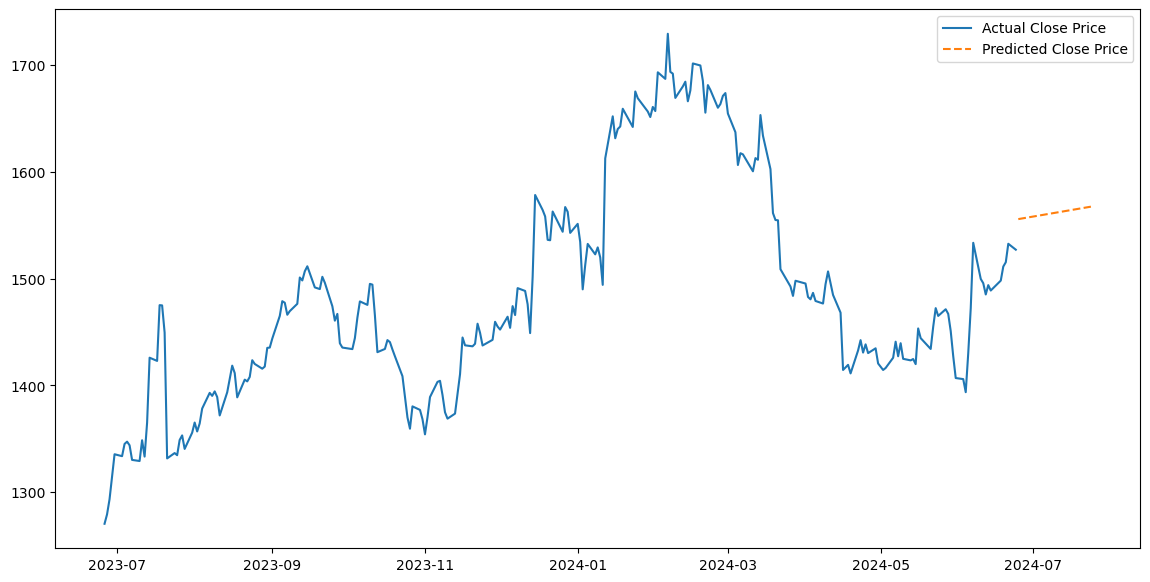

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data from CSV
def load_data(csv_file):
    stock_data = pd.read_csv(csv_file)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)
    stock_data = stock_data[['Close']]
    stock_data = stock_data.dropna()
    return stock_data

# Prepare the dataset
def prepare_data(stock_data):
    X = np.array(stock_data.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)
    y = np.array(stock_data['Close'])
    return X, y

# Train and evaluate the model
def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')
    return model

# Make future predictions
def make_predictions(stock_data, model, days=30):
    last_date = stock_data.index[-1]
    future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, days + 1)]
    future_dates_ordinals = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
    future_predictions = model.predict(future_dates_ordinals)
    future_data = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])
    return future_data

# Plot the results
def plot_results(stock_data, future_data):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Actual Close Price')
    plt.plot(future_data['Predicted_Close'], label='Predicted Close Price', linestyle='--')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    csv_file = "INFY.NS.csv"  # Replace with your CSV file path
    stock_data = load_data(csv_file)
    X, y = prepare_data(stock_data)
    model = train_and_evaluate_model(X, y)
    future_data = make_predictions(stock_data, model, days=30)
    
    # Print future predictions
    print("Next 30 days predicted prices:")
    print(future_data)
    
    plot_results(stock_data, future_data)